In [10]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [101]:
h_df = pd.read_csv('./data/dataset_ameliorer.csv')
h_df

,soil_type,soil_pH,temperature,humidity,organic_carbon,sodium,potassium,nitrogen,phosphorus,Soil_Quality,Disease
0,argileux,5.49,25.5,56.5,1.27,28.1,154.5,0.217,11.7,4.0,fusariose
1,argileux,6.09,32.6,70.8,1.44,49.6,109.9,0.110,13.1,3.8,nematodose
2,ferrugineux,4.74,34.8,35.0,0.71,27.5,54.8,0.118,8.1,3.0,flutariose
3,sableux,6.58,30.8,30.5,0.46,17.4,117.1,0.109,6.0,2.9,flutariose
4,limoneux,7.07,25.9,52.2,1.07,20.4,146.7,0.282,17.2,7.4,flutariose
...,...,...,...,...,...,...,...,...,...,...,...
9995,hydromorphe,4.84,29.5,76.5,1.19,63.6,120.5,0.112,13.1,5.4,fusariose
9996,hydromorphe,4.91,21.6,95.7,0.86,61.2,121.6,0.110,10.9,5.0,fusariose
9997,ferrugineux,4.59,31.7,43.5,0.36,45.6,41.4,0.146,13.3,3.7,fusariose
9998,limoneux,7.02,26.1,55.4,1.88,28.9,116.4,0.123,19.6,5.7,mildiou


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialiser l'encodeur
label_encoder = LabelEncoder()

# Encoder les variables catégorielles
h_df['soil_type_encoded'] = label_encoder.fit_transform(h_df['soil_type'])
h_df['Disease_encoded'] = label_encoder.fit_transform(h_df['Disease'])

# Générer un dictionnaire des correspondances pour 'soil_type'
soil_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Correspondances pour les types de sol :")
print(soil_type_mapping)

# Générer un dictionnaire des correspondances pour 'Disease'
disease_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nCorrespondances pour les maladies :")
print(disease_mapping)

#h_df.to_csv("./data/my_data.csv", index=False)

Correspondances pour les types de sol :
{'chlorose': 0, 'flutariose': 1, 'fusariose': 2, 'mildiou': 3, 'nematodose': 4}

Correspondances pour les maladies :
{'chlorose': 0, 'flutariose': 1, 'fusariose': 2, 'mildiou': 3, 'nematodose': 4}


Apres encodage des variables categorielles nous allons à presnet passer notre dataset pres pour utilisation

In [104]:
df = pd.read_csv('./data/my_data.csv')
df.head()


,soil_type,soil_pH,temperature,humidity,organic_carbon,sodium,potassium,nitrogen,phosphorus,Soil_Quality,Disease,soil_type_encoded,Disease_encoded
0,argileux,5.49,25.5,56.5,1.27,28.1,154.5,0.217,11.7,4.0,fusariose,0,2
1,argileux,6.09,32.6,70.8,1.44,49.6,109.9,0.110,13.1,3.8,nematodose,0,4
2,ferrugineux,4.74,34.8,35.0,0.71,27.5,54.8,0.118,8.1,3.0,flutariose,1,1
3,sableux,6.58,30.8,30.5,0.46,17.4,117.1,0.109,6.0,2.9,flutariose,4,1
4,limoneux,7.07,25.9,52.2,1.07,20.4,146.7,0.282,17.2,7.4,flutariose,3,1


In [105]:
# Supprimer les colonnes 'disease' et 'Disease'
df1 = df.drop(['soil_type', 'Disease', 'Soil_Quality'], axis=1)


In [106]:
df1

,soil_pH,temperature,humidity,organic_carbon,sodium,potassium,nitrogen,phosphorus,soil_type_encoded,Disease_encoded
0,5.49,25.5,56.5,1.27,28.1,154.5,0.217,11.7,0,2
1,6.09,32.6,70.8,1.44,49.6,109.9,0.110,13.1,0,4
2,4.74,34.8,35.0,0.71,27.5,54.8,0.118,8.1,1,1
3,6.58,30.8,30.5,0.46,17.4,117.1,0.109,6.0,4,1
4,7.07,25.9,52.2,1.07,20.4,146.7,0.282,17.2,3,1
...,...,...,...,...,...,...,...,...,...,...
9995,4.84,29.5,76.5,1.19,63.6,120.5,0.112,13.1,2,2
9996,4.91,21.6,95.7,0.86,61.2,121.6,0.110,10.9,2,2
9997,4.59,31.7,43.5,0.36,45.6,41.4,0.146,13.3,1,2
9998,7.02,26.1,55.4,1.88,28.9,116.4,0.123,19.6,3,3


In [107]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   soil_pH            10000 non-null  float64
 1   temperature        10000 non-null  float64
 2   humidity           10000 non-null  float64
 3   organic_carbon     10000 non-null  float64
 4   sodium             10000 non-null  float64
 5   potassium          10000 non-null  float64
 6   nitrogen           10000 non-null  float64
 7   phosphorus         10000 non-null  float64
 8   soil_type_encoded  10000 non-null  int64  
 9   Disease_encoded    10000 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 781.4 KB


,soil_pH,temperature,humidity,organic_carbon,sodium,potassium,nitrogen,phosphorus,soil_type_encoded,Disease_encoded
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.756089,31.154080,49.937080,0.921548,36.493170,104.133940,0.139825,14.033090,2.012800,1.982500
std,0.827871,4.986929,22.847534,0.426000,13.149471,32.489517,0.058219,6.262478,1.410473,1.181158
min,4.000000,20.000000,10.000000,0.200000,10.000000,40.000000,0.050000,5.000000,0.000000,0.000000
25%,5.130000,27.400000,32.400000,0.590000,26.500000,78.400000,0.097000,9.200000,1.000000,1.000000
50%,5.760000,31.300000,45.600000,0.850000,35.600000,102.900000,0.130000,12.800000,2.000000,2.000000
75%,6.380000,34.500000,69.900000,1.200000,45.500000,127.800000,0.177000,18.200000,3.000000,3.000000
max,7.500000,42.000000,100.000000,2.000000,70.000000,179.900000,0.300000,30.000000,4.000000,4.000000


Corrélations avec 'Disease_encoded' :
Disease_encoded      1.000000
organic_carbon       0.185478
phosphorus           0.173503
nitrogen             0.154418
potassium            0.106907
soil_pH              0.095028
humidity             0.053750
sodium               0.019266
soil_type_encoded    0.003436
temperature         -0.088622
Name: Disease_encoded, dtype: float64


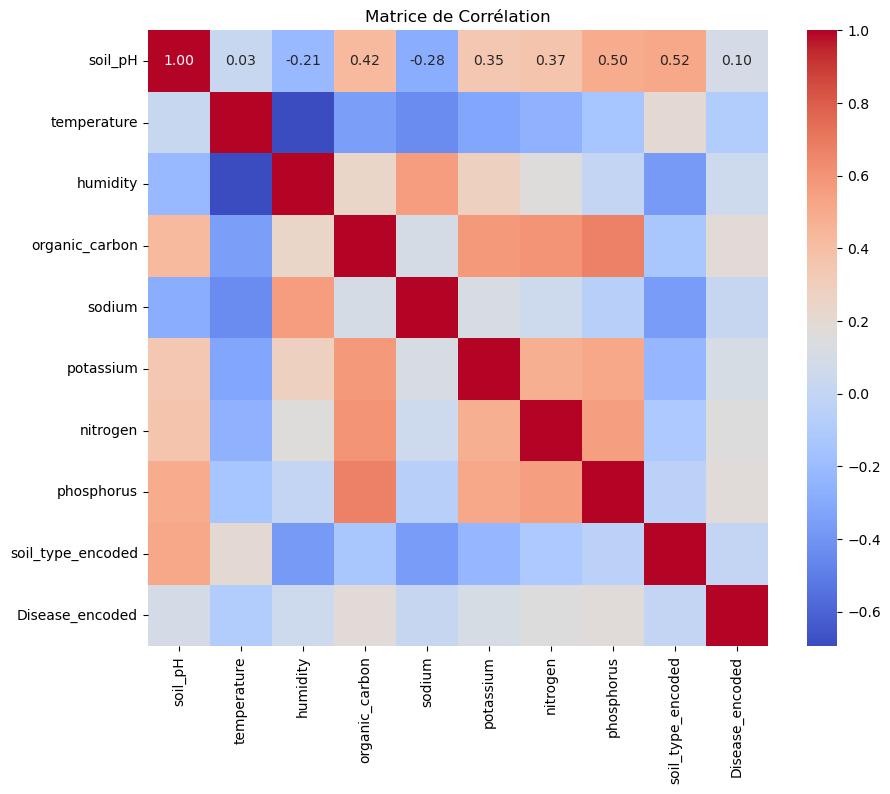

In [108]:
# Calculer la matrice de corrélation
correlation_matrix = df1.corr()

# Afficher les corrélations avec 'Disease_encoded'
cor_di = correlation_matrix['Disease_encoded'].sort_values(ascending=False)

# Afficher les corrélations avec la colonne 'Disease_encoded'
print("Corrélations avec 'Disease_encoded' :")
print(cor_di)

# Afficher un heatmap de la matrice de corrélation pour une meilleure visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de Corrélation")
plt.show()

In [110]:
x = df1.drop(columns=["Disease_encoded"])
y = df1["Disease_encoded"]

In [167]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x[0:5]

array([[-0.32142981, -1.13383654,  0.28726287,  0.81800282, -0.63832147,
         1.55030247,  1.32565207, -0.37256925, -1.42711001],
       [ 0.40335733,  0.28995644,  0.91318228,  1.21708355,  0.99680705,
         0.17748335, -0.51231778, -0.14900439, -1.42711001],
       [-1.22741374,  0.73113174, -0.65380478, -0.49661606, -0.68395297,
        -1.51853309, -0.37489947, -0.94745034, -0.71809271],
       [ 0.99526683, -0.07100516, -0.85077242, -1.0834995 , -1.45208311,
         0.39910437, -0.52949507, -1.28279764,  1.40895916],
       [ 1.58717633, -1.05362285,  0.09904934,  0.34849608, -1.22392564,
         1.31021302,  2.44217582,  0.50572129,  0.69994187]])

In [112]:

y[0:5]

0    2
1    4
2    1
3    1
4    1
Name: Disease_encoded, dtype: int64

In [129]:
# Split the data into test and train sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

In [130]:
y_train

6097    1
6704    1
9844    1
9731    1
6183    2
       ..
3714    2
7409    3
3325    1
9606    3
5787    0
Name: Disease_encoded, Length: 7000, dtype: int64

In [146]:
hp = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
hp.fit(x_train, y_train)
y_pred = hp.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.535


In [132]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.22      0.28      0.24       344
           1       0.55      0.55      0.55       591
           2       0.78      0.72      0.75      1099
           3       0.52      0.49      0.51       574
           4       0.26      0.28      0.27       392

    accuracy                           0.54      3000
   macro avg       0.47      0.46      0.46      3000
weighted avg       0.55      0.54      0.54      3000



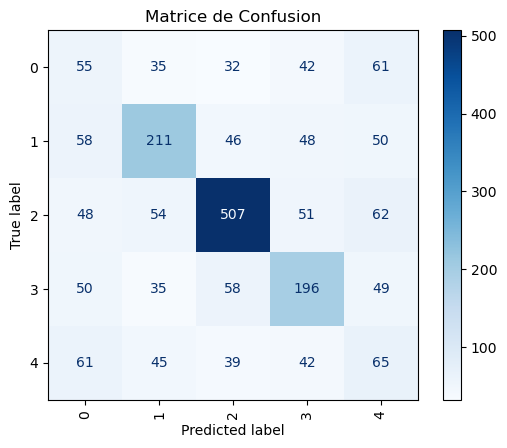

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Affichage avec noms lisibles (si tu as le mapping)
labels = hp.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

# Afficher la matrice
plt.title("Matrice de Confusion")
plt.show()

In [118]:
print(df1['Disease_encoded'].value_counts())


Disease_encoded
2    3526
1    2125
3    1856
4    1270
0    1223
Name: count, dtype: int64


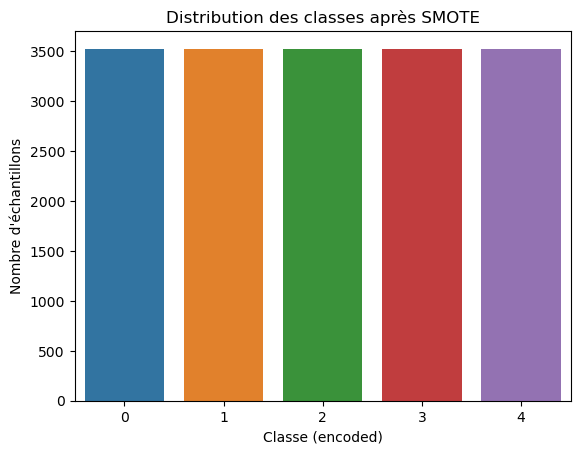

In [149]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Séparer features et cible
a = df1.drop('Disease_encoded', axis=1)
b = df1['Disease_encoded']

# Appliquer SMOTE
smote = SMOTE(random_state=42)
a_resampled, b_resampled = smote.fit_resample(a, b)

# Visualiser la distribution des classes après SMOTE
sns.countplot(x=b_resampled)
plt.title("Distribution des classes après SMOTE")
plt.xlabel("Classe (encoded)")
plt.ylabel("Nombre d'échantillons")
plt.show()

# Re-séparer en train/test après oversampling
a_train, a_test, b_train, b_test = train_test_split(a_resampled, b_resampled, test_size=0.2, random_state=42)


In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Réentraîner un modèle (ex. : Random Forest)
#hp = RandomForestClassifier(random_state=42, n_estimators=100, class_weight="balanced")
hp = RandomForestClassifier(bootstrap = False, max_depth = None, min_samples_leaf = 1, min_samples_split= 2, n_estimators = 300)
hp.fit(a_train, b_train)

# Prédictions
b_pred = hp.predict(a_test)

# Évaluation : Classification report
print("Rapport de classification :")
print(classification_report(b_test, b_pred))


Rapport de classification :
              precision    recall  f1-score   support

           0       0.65      0.82      0.72       703
           1       0.82      0.69      0.75       697
           2       0.91      0.67      0.77       712
           3       0.79      0.72      0.75       720
           4       0.64      0.80      0.71       694

    accuracy                           0.74      3526
   macro avg       0.76      0.74      0.74      3526
weighted avg       0.76      0.74      0.74      3526



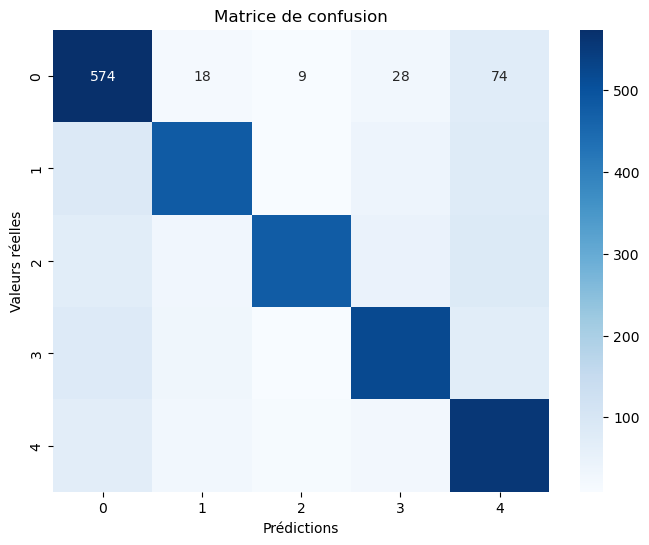

In [160]:

# Matrice de confusion
cm = confusion_matrix(b_test, b_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=hp.classes_, yticklabels=hp.classes_)
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()


In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Ton modèle déjà optimisé
rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

# Validation croisée 5-fold
scores = cross_val_score(rf_model, a_resampled, b_resampled, cv=5, scoring='f1_weighted')

# Affichage des résultats
print(f"F1 scores par fold : {scores}")
print(f"F1 score moyen : {scores.mean():.4f}")


F1 scores par fold : [0.72664488 0.72657303 0.76436274 0.81520639 0.83450102]
F1 score moyen : 0.7735


In [169]:
import pickle

with open('health_predictor.pkl', 'wb') as f:
    pickle.dump(hp, f)


In [170]:
# Charger le modèle depuis le fichier
with open('health_predictor.pkl', 'rb') as f:
    modele_charge = pickle.load(f)


In [172]:
with open("scalerh.pkl", "wb") as f:
    pickle.dump(scaler, f)



In [174]:
with open("scalerh.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)